# Homework 6

TFCB 2021

Due date: Nov 23, 2021 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [274]:
library(tidyverse)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!` 
<br>
Exclamation point performs a NOT check, so you can see if a check is not true 
<br>
https://itsalocke.com/blog/learn-to-r-blog-series---operators-and-objects/
<br>
2. `is.na` 
<br>
Will read through data an return a boolian TRUE/FALSE if a value is NA
<br>
https://www.programmingr.com/tutorial/is-na/
<br>
3. `is.numeric`
<br>
Like is.na but for doubles or integers
<br>
https://www.educative.io/answers/what-is-the-isnumeric-function-in-r
<br>
4. `anti_join`
<br>
Search two tables with one or more common specified IDs, and print the results that do not match between the tables
<br>
http://zevross.com/blog/2014/08/05/using-the-r-function-anti_join-to-find-unmatched-records/
<br>
5. `desc`
<br>
This will sort your data in descending order
<br>
https://dplyr.tidyverse.org/reference/desc.html
<br>
6. `dplyr::slice`
<br>
Select, remove, or duplicate specified rows, with lots of handy arguments.
<br>
https://dplyr.tidyverse.org/reference/slice.html
<br>
7. `dplyr::across`
<br>
This is used inside data masking functions like summarize() and mutate(), to apply the same transformation to multiple columns
<br>
https://dplyr.tidyverse.org/reference/across.html

## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [275]:
# Define the file path of the tsv, read, and pipe into the next line
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
  # Select your columns of interest, and pipe into the next line
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
  # Within the ccds_id column, filter for all rows to do not contain NA
  filter(!is.na(ccds_id)) %>%
  print()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 19229 Columns: 54
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (39): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (3): entrez_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 18,785 × 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo… CCDS12…
 2 ENSG00000148584 A1CF    APOBEC1 complementation factor     RNA bindi… CCDS72…
 3 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m… CCDS44…
 4 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m… CCDS85…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt… CCDS60…
 6 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (… Alpha 1,4… CCDS14…
 7 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra… Alpha 1,4… CCDS30…
 8 ENSG00000094914 AAAS    aladin WD repeat nucleoporin       WD repeat… CCDS53…
 9 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA … CCDS92…
10 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A… CCDS33…
# … w

In [276]:
# Define the file path of the tsv, read, and pipe into the next line
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
  # Rename the ensembl_gene_id column
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 43034 rows containing non-finite values (stat_sum).”


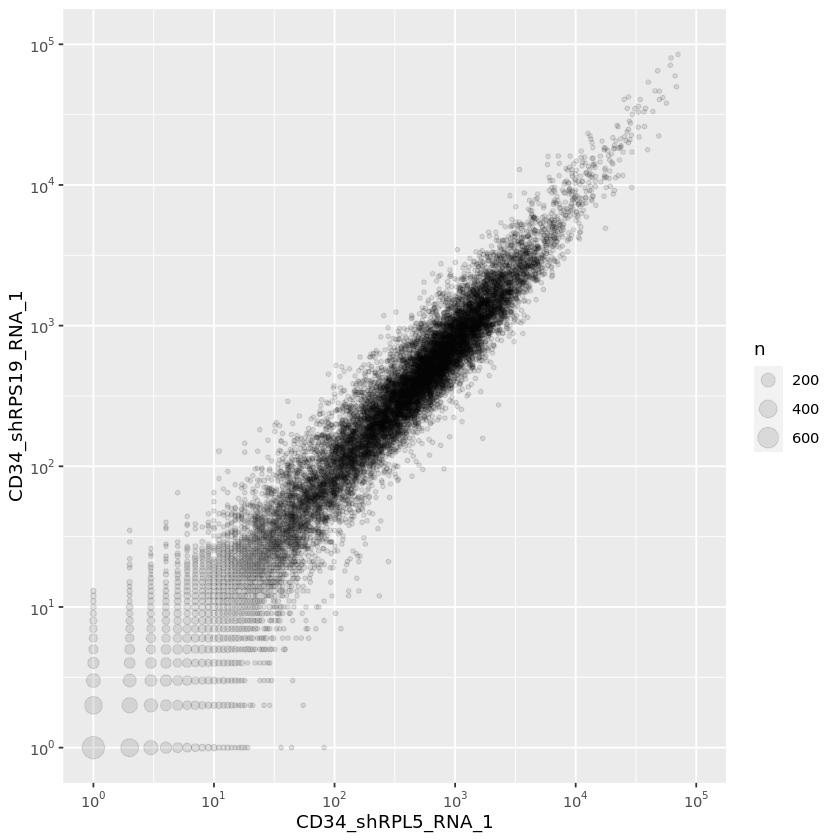

In [277]:
library(scales) # we will use this for the trans_format function later
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>% # select your columns
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) + # define plot axes
  geom_count(alpha = 0.1) + # Im using a count function to convey how many overlapping points are present in each region
  scale_y_log10(limits = c(1,100000), n.breaks = 6, labels = trans_format('log10', math_format(10^.x))) + # set the axis to log scale, with 6 ticks in exponential format
  scale_x_log10(limits = c(1,100000), n.breaks = 6, labels = trans_format('log10', math_format(10^.x))) # same as above

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [278]:
data <- data %>%
  select(ensembl_gene_id, matches('RPL5|RPS19|Luc')) %>% # select the gene ID, and all rows containing the desired text
  print()

# A tibble: 63,677 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                40                49                 6
 2 ENSG00000000005                 0                 0                 0
 3 ENSG00000000419              1116              1000               101
 4 ENSG00000000457               149               126                14
 5 ENSG00000000460               289               268                52
 6 ENSG00000000938               204               145                17
 7 ENSG00000000971               241               203                45
 8 ENSG00000001036              1487               936               182
 9 ENSG00000001084              1036              1224               134
10 ENSG00000001167               498               557                75
# … with 63,667 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <db

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [279]:
data <- data %>%
  filter(across(c(2:13), ~. > 50)) %>% # filter across columns 2-13, dropping any row with a value below 50
  print()

Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


# A tibble: 4,185 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419              1116              1000               101
 2 ENSG00000001036              1487               936               182
 3 ENSG00000001084              1036              1224               134
 4 ENSG00000001497              1436              1231               253
 5 ENSG00000002549              1228              1186               285
 6 ENSG00000002586              2746              1600               260
 7 ENSG00000002834              4346              3800               254
 8 ENSG00000003056              1379              1661               321
 9 ENSG00000003393               832               690                84
10 ENSG00000003402              1836              1382                95
# … with 4,175 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <dbl>

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [280]:
data <- data %>% 
  mutate_if(is.numeric, funs(./median(.))) %>% # mutate all numeric values based on the median of the column
  print()

# A tibble: 4,185 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419             0.811             0.827             0.612
 2 ENSG00000001036             1.08              0.774             1.10 
 3 ENSG00000001084             0.753             1.01              0.812
 4 ENSG00000001497             1.04              1.02              1.53 
 5 ENSG00000002549             0.892             0.981             1.73 
 6 ENSG00000002586             2.00              1.32              1.58 
 7 ENSG00000002834             3.16              3.14              1.54 
 8 ENSG00000003056             1.00              1.37              1.95 
 9 ENSG00000003393             0.605             0.571             0.509
10 ENSG00000003402             1.33              1.14              0.576
# … with 4,175 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <dbl>

## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [281]:
lfc <- data %>%
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>%
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te)) %>%
  mutate(lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%
  print()

# A tibble: 4,185 × 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.915         1.48          1.08       -0.244
 2 ENSG00000001036        1.16          1.10          1.45       -0.321
 3 ENSG00000001084        1.01          1.13          0.851       0.253
 4 ENSG00000001497        1.38          1.04          1.75       -0.343
 5 ENSG00000002549        1.77          1.85          1.50        0.241
 6 ENSG00000002586        0.898         0.818         1.13       -0.335
 7 ENSG00000002834        0.477         0.391         0.518      -0.120
 8 ENSG00000003056        1.86          1.85          1.02        0.877
 9 ENSG00000003393        0.827         1.19          0.461       0.842
10 ENSG00000003402        0.502         0.424         0.344       0.547
# … with 4,175 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [282]:
mean_lfc <- lfc %>%
  mutate(avg_lfc = (lfc_te_rpl5 + lfc_te_rps19)/2) %>% # make a column called avg_lfc, averaging the lfc of rpl15 and rps19
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te, avg_lfc) %>% # select desired columns
  print()

# A tibble: 4,185 × 5
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te avg_lfc
   <chr>                  <dbl>         <dbl>         <dbl>   <dbl>
 1 ENSG00000000419        0.915         1.48          1.08    0.104
 2 ENSG00000001036        1.16          1.10          1.45   -0.362
 3 ENSG00000001084        1.01          1.13          0.851   0.330
 4 ENSG00000001497        1.38          1.04          1.75   -0.549
 5 ENSG00000002549        1.77          1.85          1.50    0.273
 6 ENSG00000002586        0.898         0.818         1.13   -0.403
 7 ENSG00000002834        0.477         0.391         0.518  -0.263
 8 ENSG00000003056        1.86          1.85          1.02    0.873
 9 ENSG00000003393        0.827         1.19          0.461   1.11 
10 ENSG00000003402        0.502         0.424         0.344   0.424
# … with 4,175 more rows



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [283]:
mean_lfc <- mean_lfc %>% 
  inner_join(annotations, by = 'ensembl_gene_id') %>% # join the two tsvs based on the gene ID
  print()

# A tibble: 4,152 × 9
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te avg_lfc symbol name 
   <chr>                  <dbl>         <dbl>         <dbl>   <dbl> <chr>  <chr>
 1 ENSG00000000419        0.915         1.48          1.08    0.104 DPM1   doli…
 2 ENSG00000001036        1.16          1.10          1.45   -0.362 FUCA2  alph…
 3 ENSG00000001084        1.01          1.13          0.851   0.330 GCLC   glut…
 4 ENSG00000001497        1.38          1.04          1.75   -0.549 LAS1L  LAS1…
 5 ENSG00000002549        1.77          1.85          1.50    0.273 LAP3   leuc…
 6 ENSG00000002586        0.898         0.818         1.13   -0.403 CD99   CD99…
 7 ENSG00000002834        0.477         0.391         0.518  -0.263 LASP1  LIM …
 8 ENSG00000003056        1.86          1.85          1.02    0.873 M6PR   mann…
 9 ENSG00000003393        0.827         1.19          0.461   1.11  ALS2   alsi…
10 ENSG00000003402        0.502         0.424         0.344   0.424 CFLAR  CASP…
# … wi

## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

# A tibble: 10 × 3
   symbol name                                       avg_lfc
   <chr>  <chr>                                        <dbl>
 1 H2AC6  H2A clustered histone 6                      -2.96
 2 H2BC12 H2B clustered histone 12                     -2.80
 3 RPS15  ribosomal protein S15                        -2.28
 4 COX8A  cytochrome c oxidase subunit 8A              -2.03
 5 RPL18A ribosomal protein L18a                       -2.02
 6 RPLP1  ribosomal protein lateral stalk subunit P1   -2.02
 7 H2AX   H2A.X variant histone                        -1.87
 8 RPS26  ribosomal protein S26                        -1.85
 9 APOE   apolipoprotein E                             -1.69
10 RPL7A  ribosomal protein L7a                        -1.69


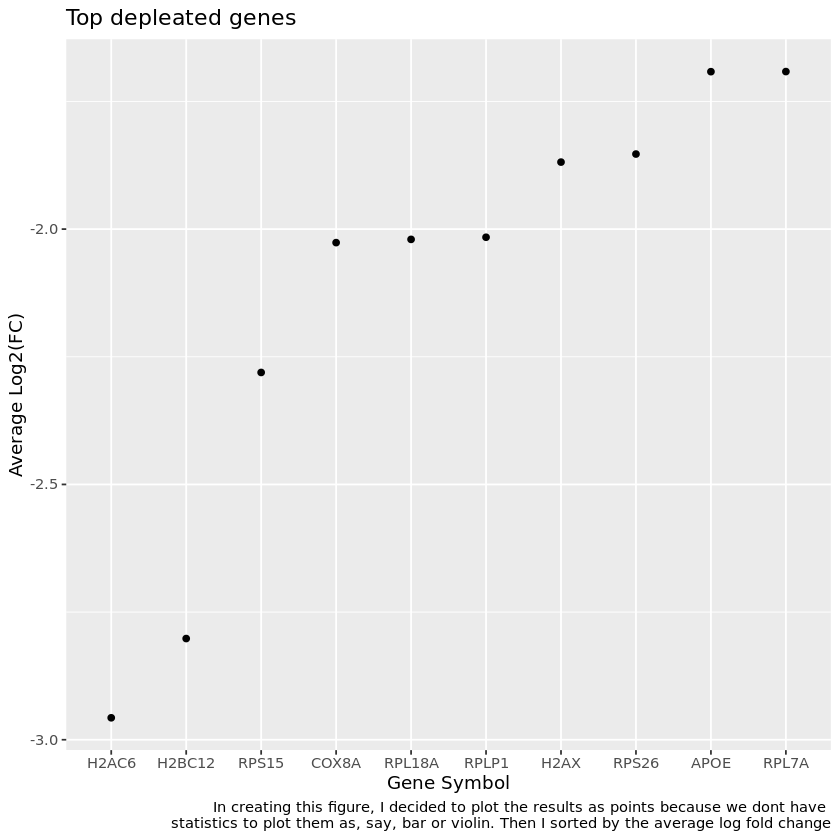

In [284]:
mean_lfc <- mean_lfc %>%
slice_min(avg_lfc, n = 10) %>%  # slice the 10 min values of the avg_lfc
select(symbol, name, avg_lfc) %>% # select the desired columns
print()

mean_lfc %>%
ggplot(aes(x = reorder(symbol, avg_lfc), y = avg_lfc)) +  # plot symbol vs avg_lfc and reorder based on avg_lfc
labs( # set lables
  x = 'Gene Symbol',
  y = 'Average Log2(FC)',
  title = 'Top depleated genes',
  caption = 'In creating this figure, I decided to plot the results as points because we dont have 
  statistics to plot them as, say, bar or violin. Then I sorted by the average log fold change') +
geom_point() # plot as a dot plot
